Accuracy: 0.9781420765027322
Precision: 0.9781420765027322
Recall: 0.9781420765027322
F1 Score: 0.9781420765027322


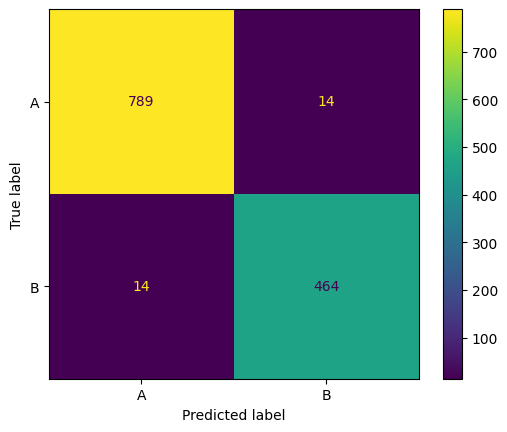

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv("F:\\DATASETS\\loan_approval_dataset.csv")

df.head()

df.columns

df=df.drop('loan_id',axis=1)

df.head()

df[' education'][0]

map={
    ' Graduate': 1, ' Not Graduate': 0
}
df=df.replace(map)

map={
    ' No':0,' Yes':1
}
df=df.replace(map)

df

X=df.iloc[0:,0:11]
y=df.iloc[0:,11]

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=2)

clf=RandomForestClassifier()
clf.fit(xtrain,ytrain)
pred=clf.predict(xtest)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

cm=metrics.confusion_matrix(ytest,pred)
eff=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['A','B'])
eff.plot()

accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred, average='weighted')
recall = recall_score(ytest, pred, average='weighted')
f1 = f1_score(ytest, pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

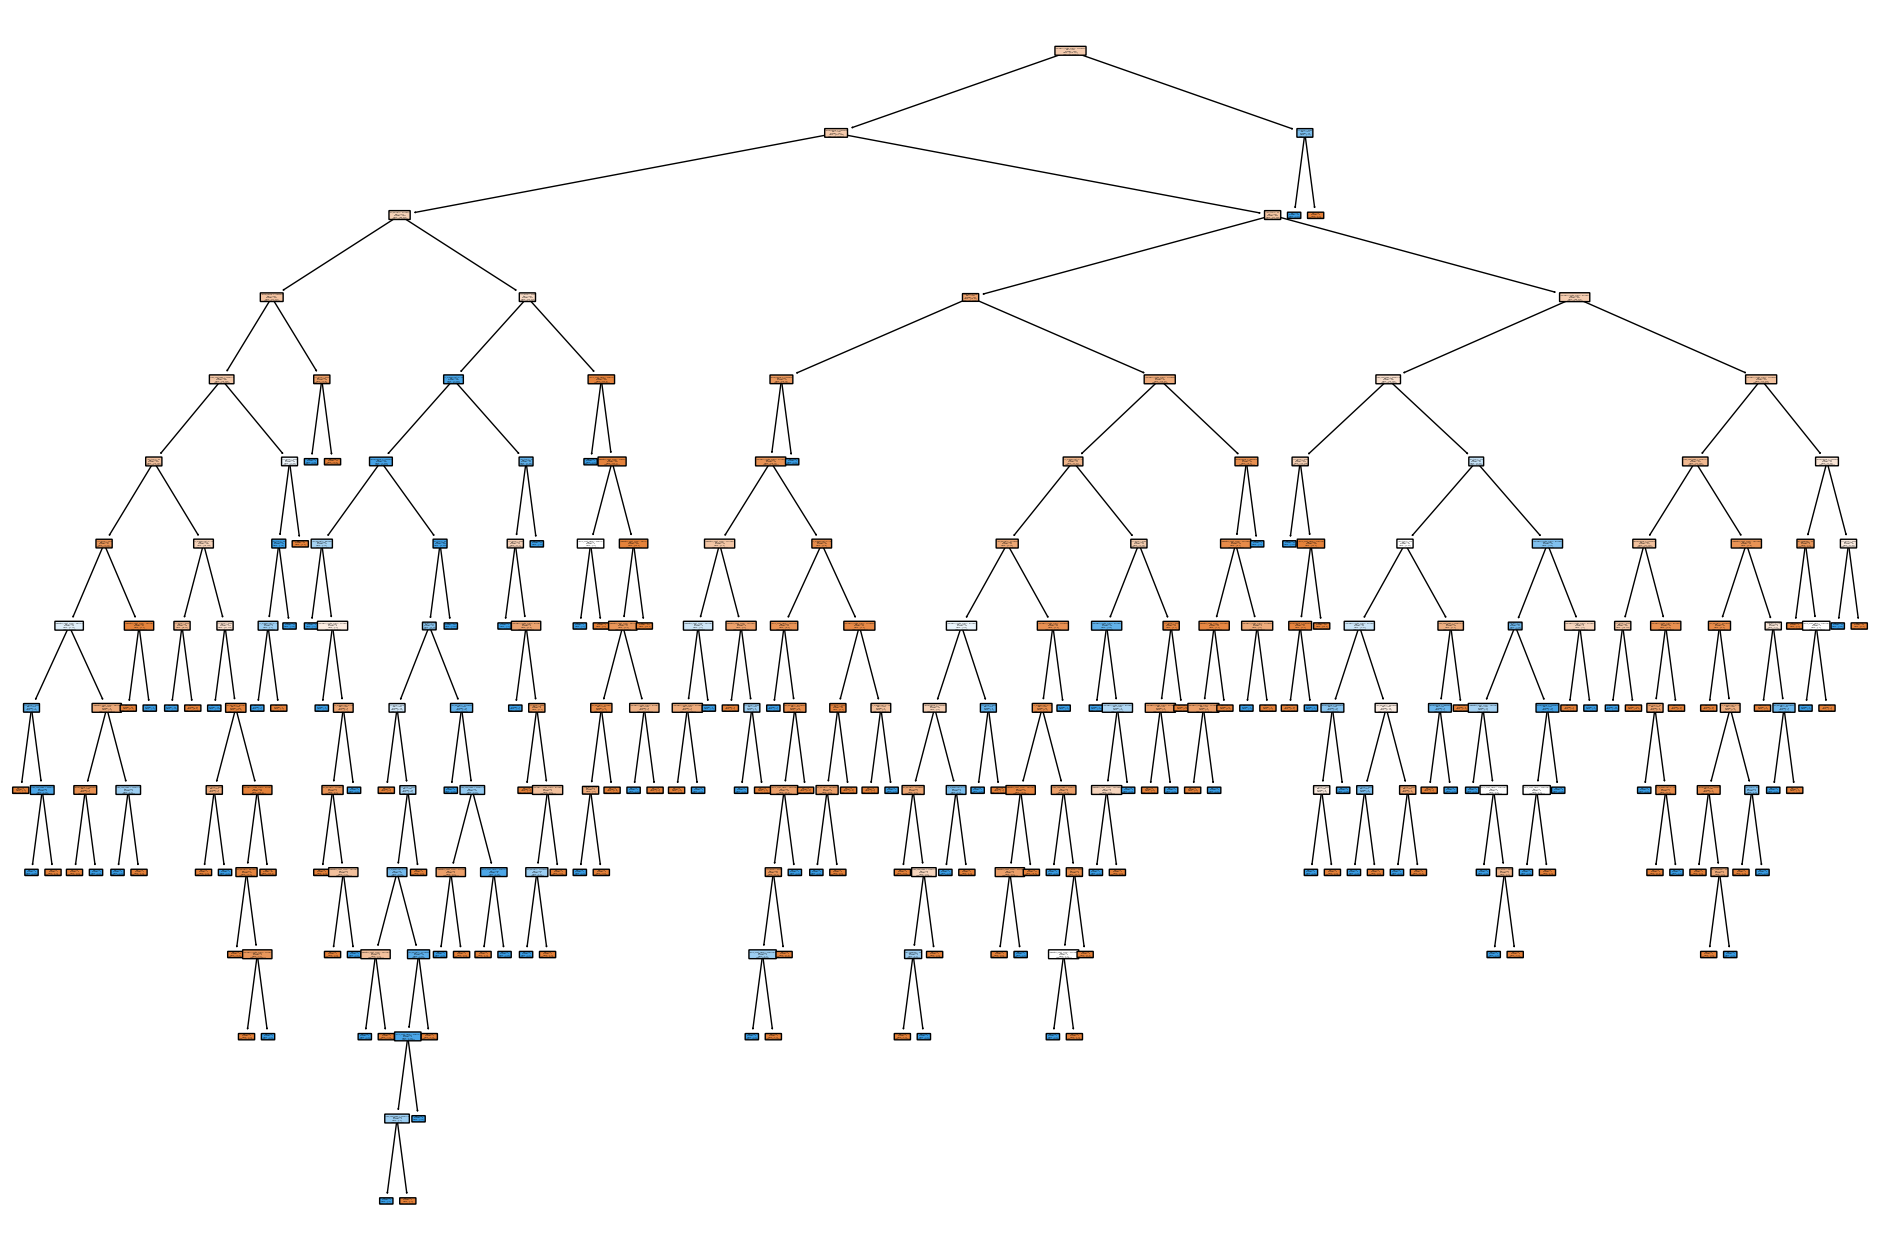

In [131]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 16))
tree.plot_tree(clf.estimators_[0], feature_names=list(X.columns), class_names=['Not Approved', 'Approved'], filled=True, rounded=True)
plt.show()